In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import joblib
import streamlit as st
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

In [17]:
knn = KNeighborsClassifier(n_neighbors=15)

In [18]:
df = pd.read_csv('dataset/cardio_train.csv', delimiter=';')
df['age'] = (df['age']/365).astype(int)
df['bmi'] = (df['weight'] / ((df['height']/100)**2)).astype(float)
print(df.head())
df.to_csv("1output.csv", index=False, sep=",")

   id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168   62.00    110     80            1     1      0   
1   1   55       1     156   85.00    140     90            3     1      0   
2   2   51       1     165   64.00    130     70            3     1      0   
3   3   48       2     169   82.00    150    100            1     1      0   
4   4   47       1     156   56.00    100     60            1     1      0   

   alco  active  cardio   bmi  
0     0       1       0 21.97  
1     0       1       1 34.93  
2     0       0       1 23.51  
3     0       1       1 28.71  
4     0       0       0 23.01  


In [19]:
# Q1 = df['ap_hi'].quantile(0.25)
# Q3 = df['ap_hi'].quantile(0.75)
# IQR = Q3 - Q1

# # 이상치 정의 (Q1 - 1.5 * IQR 이상, Q3 + 1.5 * IQR 미만)
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# Q11 = df['bmi'].quantile(0.25)
# Q33 = df['bmi'].quantile(0.75)
# IQR1 = Q33 - Q11

# # 이상치 정의 (Q1 - 1.5 * IQR 이상, Q3 + 1.5 * IQR 미만)
# lower_bound1 = Q11 - 1.5 * IQR1
# upper_bound1 = Q33 + 1.5 * IQR1

# # 이상치 제거
# df_cleaned = df[(df['ap_hi'] >= lower_bound) & (df['ap_hi'] <= upper_bound) & (df['bmi'] >= lower_bound1) & (df['bmi'] <= upper_bound1)]

In [20]:
selected_features = ['bmi','ap_hi']
X = df_cleaned[selected_features]
y = df_cleaned['cardio']

In [21]:
from scipy.stats import chi2_contingency

# 범주형 변수로 교차 테이블 생성
contingency_table = pd.crosstab(df_cleaned['ap_hi'], df_cleaned['bmi'])

# 카이 제곱 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)

# p-value 출력
print("p-value:", p)

p-value: 0.0


In [22]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 결정 트리나 랜덤 포레스트를 사용한 비선형 모델 학습
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 변수 중요도 확인
print(model.feature_importances_)

[0.55122759 0.44877241]


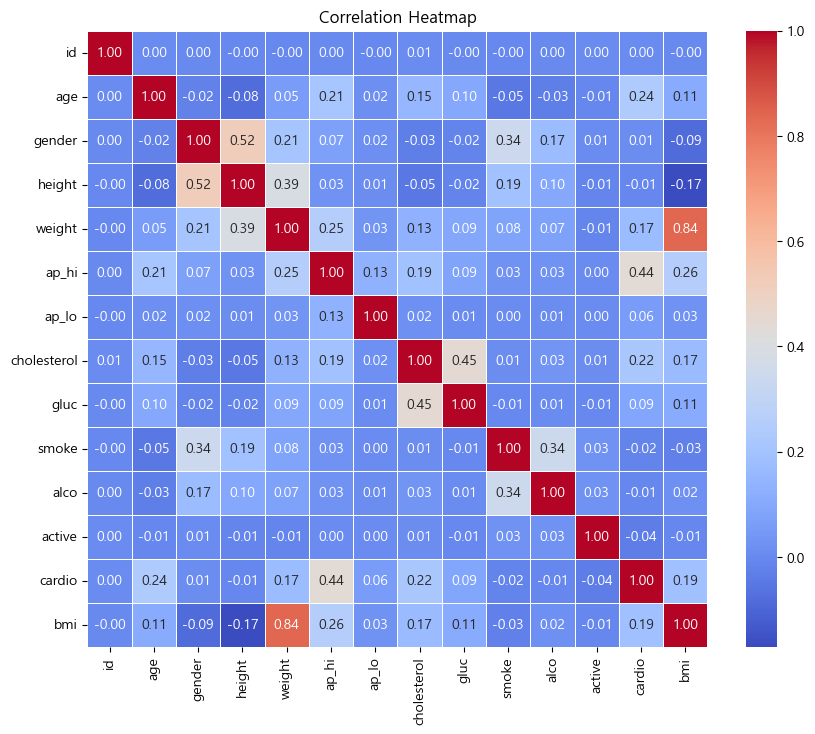

In [23]:
# 데이터프레임에서 상관계수 계산
correlation_matrix = df_cleaned.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))  # 그래프 크기 조정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# 타이틀 및 레이블 설정
plt.title('Correlation Heatmap')
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)

# 모델 평가
accuracy = model.score(X_test, y_test)
print(f"모델 정확도: {accuracy * 100:.2f}%")

모델 정확도: 71.22%


In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [27]:
y_pred = knn.predict(X_test)

# 정확도 평가
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7006073329834296


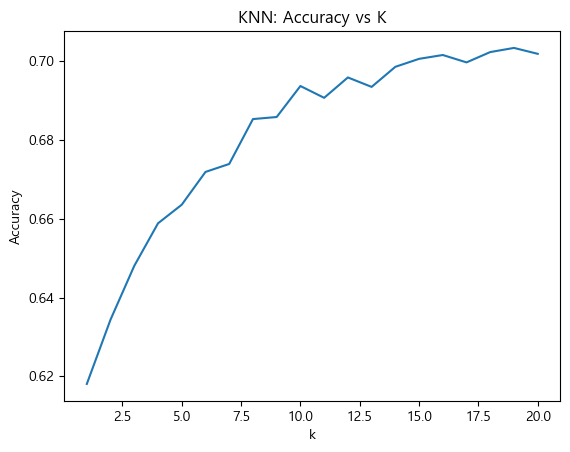

In [28]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

# 정확도 그래프 그리기
plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs K')
plt.show()

In [29]:
# Q1 = df['ap_hi'].quantile(0.25)
# Q3 = df['ap_hi'].quantile(0.75)
# IQR = Q3 - Q1

# # 이상치 정의 (Q1 - 1.5 * IQR 이상, Q3 + 1.5 * IQR 미만)
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# Q11 = df['bmi'].quantile(0.25)
# Q33 = df['bmi'].quantile(0.75)
# IQR1 = Q33 - Q11

# # 이상치 정의 (Q1 - 1.5 * IQR 이상, Q3 + 1.5 * IQR 미만)
# lower_bound1 = Q11 - 1.5 * IQR1
# upper_bound1 = Q33 + 1.5 * IQR1

# # 이상치 제거
# df_cleaned = df[(df['ap_hi'] >= lower_bound) & (df['ap_hi'] <= upper_bound) & (df['bmi'] >= lower_bound1) & (df['bmi'] <= upper_bound1)]


# Q1 = df_cleaned['ap_hi'].quantile(0.25)
# Q3 = df_cleaned['ap_hi'].quantile(0.75)
# IQR = Q3 - Q1

# # 이상치 정의 (Q1 - 1.5 * IQR 이상, Q3 + 1.5 * IQR 미만)
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# Q11 = df_cleaned['bmi'].quantile(0.25)
# Q33 = df_cleaned['bmi'].quantile(0.75)
# IQR1 = Q33 - Q11

# # 이상치 정의 (Q1 - 1.5 * IQR 이상, Q3 + 1.5 * IQR 미만)
# lower_bound1 = Q11 - 1.5 * IQR1
# upper_bound1 = Q33 + 1.5 * IQR1

# # 이상치 제거
# df_cleaned_cleaned = df_cleaned[(df_cleaned['ap_hi'] >= lower_bound) & (df_cleaned['ap_hi'] <= upper_bound) & (df_cleaned['bmi'] >= lower_bound1) & (df_cleaned['bmi'] <= upper_bound1)]

# # sns.boxplot(x=df_cleaned['ap_hi'])
# # sns.boxplot(x=df_cleaned['bmi'])
# plt.show()


# sns.scatterplot(x='cardio', y='ap_hi', data=df_cleaned_cleaned)
# plt.title('혈압과 심장병 발병 여부')
# plt.show()

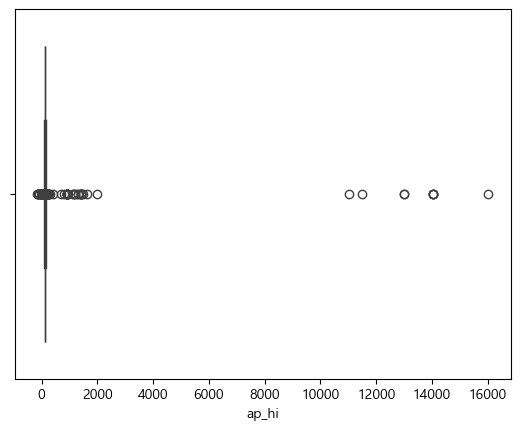

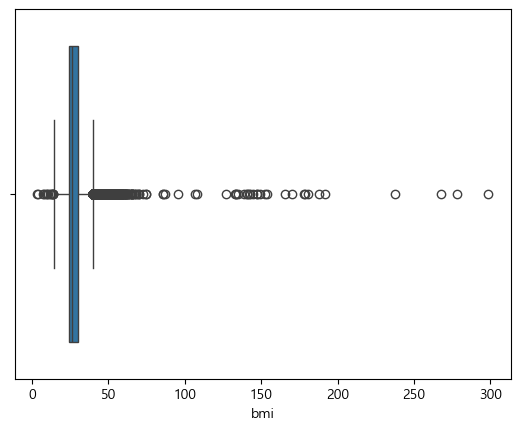

In [34]:
sns.boxplot(x=df['ap_hi'])
plt.show()
sns.boxplot(x=df['bmi'])
plt.show()

In [31]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.67


In [32]:
accuracy = accuracy_score(y_test, rf_y_pred)
precision = precision_score(y_test, rf_y_pred)
recall = recall_score(y_test, rf_y_pred)
f1 = f1_score(y_test, rf_y_pred)

print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

Accuracy: 0.67, Precision: 0.70, Recall: 0.59, F1 Score: 0.64


In [33]:
models = {
    "RandomForestRegressor" : RandomForestRegressor(random_state=42, n_estimators=100),
    "LinearRegression" : LinearRegression(),
    "Decision Tree" : DecisionTreeRegressor(random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {"accuracy" : accuracy, "precision" : precision, "recall" : recall, "f1" : f1}
    print(f"{name} - mse : {mse:.2f}, r2 : {r2:.2f}, accuracy : {accuracy:.2f}, precision : {precision:.2f}, recall : {recall:.2f}, f1 : {f1:.2f}")
    results[name] = {"mse" : mse, "r2" : r2}
    
best_model = max(results, key = lambda x: results[x]['r2'])
print("\n최적 모델 : ", best_model)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

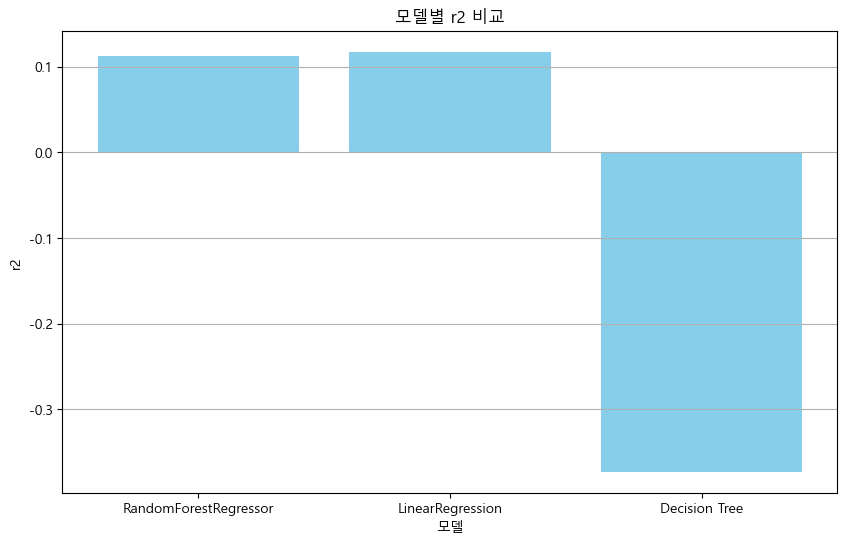

In [ ]:
r2s = [result["r2"] for result in results.values()]
model_names = list(results.keys())

plt.figure(figsize=(10, 6))
plt.bar(model_names, r2s, color = 'skyblue')
plt.xlabel("모델")
plt.ylabel("r2")
plt.title("모델별 r2 비교")
plt.grid(axis = 'y')
# plt.show()